In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("housing.data", delim_whitespace=True, header=None)

In [ ]:
df.head()

In [ ]:
col_name = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

In [ ]:
df.columns = col_name

In [ ]:
df.head()

# Exploatory Data Analysis (EDA)

In [ ]:
df.describe()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.pairplot(df, size = 1.5);
plt.show()

In [ ]:
col_study = ["ZN", "INDUS", "NOX", "RM"]

In [ ]:
sns.pairplot(df[col_study], size = 2.5);
plt.show()

In [ ]:
col_study = ["PTRATIO", "B", "LSTAT", "MEDV"]

In [ ]:
sns.pairplot(df[col_study], size = 2.5);
plt.show()

# Correlation Analysis and Feature Selection

In [ ]:
pd.options.display.float_format = "{:,.2f}".format

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(df[["CRIM", "ZN", "INDUS", "CHAS", "MEDV"]].corr(), annot=True)
plt.show()

# Linear Regression with Scikit-Learn

In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df = pd.read_csv("housing.data", delim_whitespace=True, header=None)
col_name = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df.columns = col_name

In [34]:
X = df["RM"].values.reshape(-1, 1)

In [35]:
y = df["MEDV"].values

In [36]:
model = LinearRegression()

In [37]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
model.coef_

array([ 9.10210898])

In [39]:
model.intercept_

-34.670620776438568

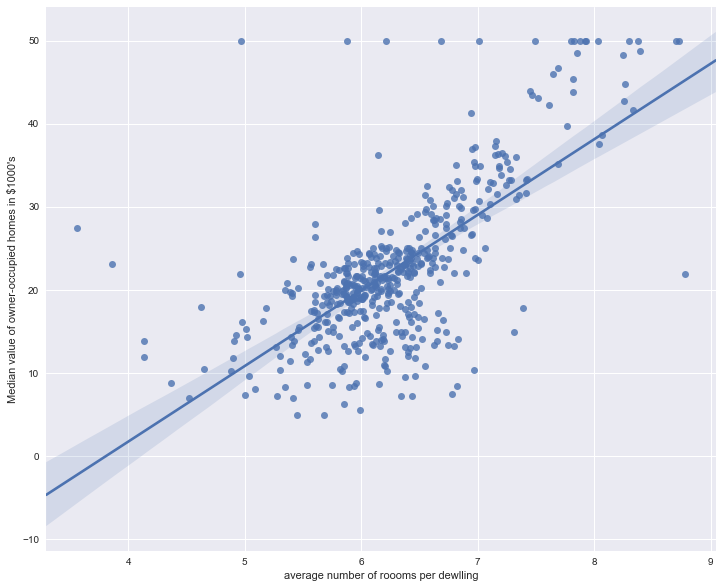

In [40]:
plt.figure(figsize=(12, 10));
sns.regplot(X, y);
plt.xlabel("average number of roooms per dewlling")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

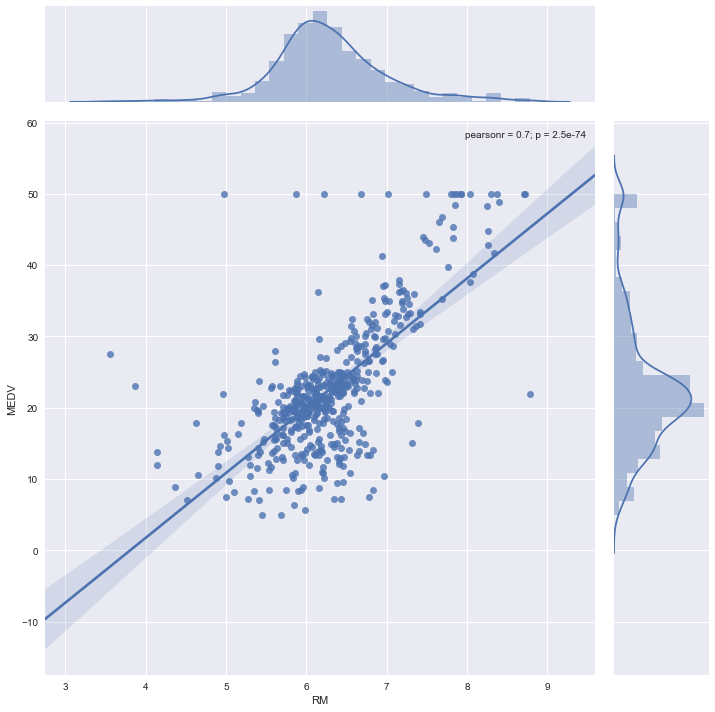

In [41]:
sns.jointplot(x = "RM", y = "MEDV", data = df, kind = "reg", size = 10);
plt.show();

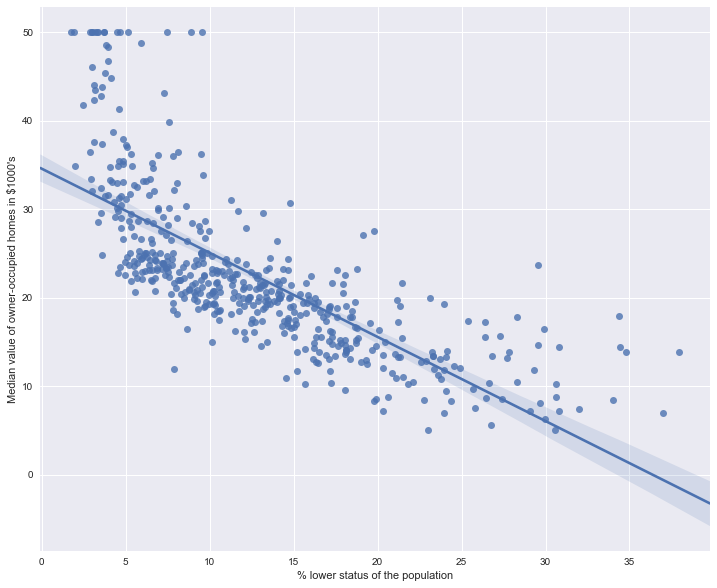

In [42]:
X = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values
model.fit(X, y)
plt.figure(figsize = (12, 10));
sns.regplot(X, y)
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

# Robust Regression


## RANdom SAmple Concensus (RANSAC) Algorithm
link = http://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html

In [19]:
import numpy as np
from sklearn.linear_model import RANSACRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv("housing.data", delim_whitespace=True, header=None)
col_name = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df.columns = col_name

In [21]:
X = df["RM"].values.reshape(-1, 1)
y = df["MEDV"].values

In [22]:
ransac = RANSACRegressor()

In [23]:
ransac.fit(X, y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [24]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [25]:
np.arange(3, 10, 1)

array([3, 4, 5, 6, 7, 8, 9])

In [26]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

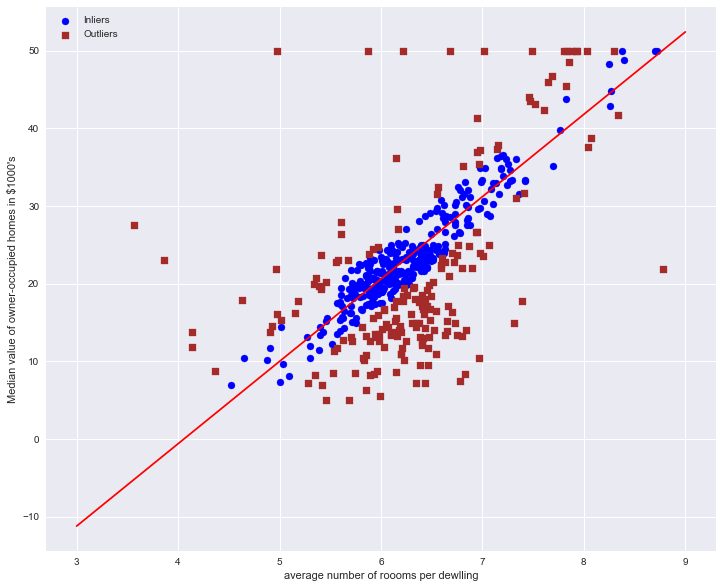

In [27]:
sns.set(style="darkgrid", context = "notebook")
plt.figure(figsize=(12, 10))
plt.scatter( X[inlier_mask], y[inlier_mask], c = "blue", marker = "o", label = "Inliers")
plt.scatter( X[outlier_mask], y[outlier_mask], c = "brown", marker = "s", label = "Outliers")
plt.plot(line_X, line_y_ransac, color = "red")
plt.xlabel("average number of roooms per dewlling")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc = "upper left")
plt.show()